# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import json

# Import the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

saved_lats = []
saved_longs = []

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)
        saved_lats.append(lat_lng[0])
        saved_longs.append(lat_lng[1])

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

#Create city_list df to check cities and coordinates have been grouped.
city_list = pd.DataFrame({'City': cities, 'Latitude': saved_lats,
                           'Longitude': saved_longs})
city_list.head()
                           
                           
                           

Number of cities in the list: 620


,City,Latitude,Longitude
0,matara,-3.364525,82.187788
1,ushuaia,-74.623149,-68.103813
2,butaritari,7.457262,175.293921
3,cumberland,39.817034,-79.163561
4,mataura,-39.509399,-143.123848


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
base_url = "http://api.openweathermap.org/data/2.5/weather?"
units = 'metric'

query_url = f'{base_url}&units={units}&APPID={weather_api_key}&q='

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = query_url + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | matara
Processing Record 2 of Set 1 | ushuaia
Processing Record 3 of Set 1 | butaritari
Processing Record 4 of Set 1 | cumberland
Processing Record 5 of Set 1 | mataura
Processing Record 6 of Set 1 | luderitz
Processing Record 7 of Set 1 | jumla
Processing Record 8 of Set 1 | bundaberg
Processing Record 9 of Set 1 | sentyabrskiy
City not found. Skipping...
Processing Record 10 of Set 1 | rikitea
Processing Record 11 of Set 1 | kinkala
Processing Record 12 of Set 1 | provideniya
Processing Record 13 of Set 1 | bengkulu
Processing Record 14 of Set 1 | juneau
Processing Record 15 of Set 1 | tapejara
Processing Record 16 of Set 1 | iqaluit
Processing Record 17 of Set 1 | arraial do cabo
Processing Record 18 of Set 1 | dongsheng
Processing Record 19 of Set 1 | fairbanks
Processing Record 20 of Set 1 | bredasdorp
Processing Record 21 of Set 1 | soto la marina
Processing Record 22 of Set 1 | poum
Proces

Processing Record 39 of Set 4 | naze
Processing Record 40 of Set 4 | jeremie
Processing Record 41 of Set 4 | porto novo
Processing Record 42 of Set 4 | margate
Processing Record 43 of Set 4 | linhares
Processing Record 44 of Set 4 | aykhal
Processing Record 45 of Set 4 | illoqqortoormiut
City not found. Skipping...
Processing Record 46 of Set 4 | bandarbeyla
Processing Record 47 of Set 4 | camacha
Processing Record 48 of Set 4 | jequie
Processing Record 49 of Set 4 | esperance
Processing Record 0 of Set 5 | shentala
Processing Record 1 of Set 5 | cap malheureux
Processing Record 2 of Set 5 | meyungs
City not found. Skipping...
Processing Record 3 of Set 5 | jennersdorf
Processing Record 4 of Set 5 | atar
Processing Record 5 of Set 5 | ibra
Processing Record 6 of Set 5 | victoria
Processing Record 7 of Set 5 | vardo
Processing Record 8 of Set 5 | turayf
Processing Record 9 of Set 5 | rosamorada
Processing Record 10 of Set 5 | yar-sale
Processing Record 11 of Set 5 | boysun
Processing Re

Processing Record 20 of Set 8 | santa cruz
Processing Record 21 of Set 8 | puerto del rosario
Processing Record 22 of Set 8 | valparaiso
Processing Record 23 of Set 8 | khani
Processing Record 24 of Set 8 | evensk
Processing Record 25 of Set 8 | yaroslavskiy
Processing Record 26 of Set 8 | kajiado
Processing Record 27 of Set 8 | xushan
Processing Record 28 of Set 8 | general bravo
Processing Record 29 of Set 8 | sabancuy
Processing Record 30 of Set 8 | papar
Processing Record 31 of Set 8 | stantsiya gorchakovo
City not found. Skipping...
Processing Record 32 of Set 8 | patiya
Processing Record 33 of Set 8 | kangavar
Processing Record 34 of Set 8 | veraval
Processing Record 35 of Set 8 | meulaboh
Processing Record 36 of Set 8 | mahendranagar
Processing Record 37 of Set 8 | paka
Processing Record 38 of Set 8 | ler
Processing Record 39 of Set 8 | namibe
Processing Record 40 of Set 8 | saint-augustin
Processing Record 41 of Set 8 | kyra
Processing Record 42 of Set 8 | kerecsend
Processing 

Processing Record 7 of Set 12 | creston
Processing Record 8 of Set 12 | coos bay
Processing Record 9 of Set 12 | moron
Processing Record 10 of Set 12 | chadiza
Processing Record 11 of Set 12 | wewak
Processing Record 12 of Set 12 | normandin
Processing Record 13 of Set 12 | ponta pora
Processing Record 14 of Set 12 | onufriyivka
Processing Record 15 of Set 12 | ostrovnoy
Processing Record 16 of Set 12 | colares
Processing Record 17 of Set 12 | ayni
Processing Record 18 of Set 12 | sambava
Processing Record 19 of Set 12 | isangel
Processing Record 20 of Set 12 | lakes entrance
Processing Record 21 of Set 12 | hasaki
Processing Record 22 of Set 12 | emba
Processing Record 23 of Set 12 | lazaro cardenas
Processing Record 24 of Set 12 | castrovillari
Processing Record 25 of Set 12 | mahebourg
Processing Record 26 of Set 12 | liepaja
Processing Record 27 of Set 12 | erenhot
Processing Record 28 of Set 12 | qinggang
Processing Record 29 of Set 12 | yenagoa
Processing Record 30 of Set 12 | te

In [4]:
city_data

[{'City': 'matara',
  'Lat': 5.9485,
  'Lng': 80.5353,
  'Max Temp': 24.01,
  'Humidity': 87,
  'Cloudiness': 42,
  'Wind Speed': 2.99,
  'Country': 'LK',
  'Date': 1680903166},
 {'City': 'ushuaia',
  'Lat': -54.8,
  'Lng': -68.3,
  'Max Temp': 4.81,
  'Humidity': 81,
  'Cloudiness': 75,
  'Wind Speed': 5.14,
  'Country': 'AR',
  'Date': 1680903166},
 {'City': 'butaritari',
  'Lat': 3.0707,
  'Lng': 172.7902,
  'Max Temp': 27.82,
  'Humidity': 79,
  'Cloudiness': 65,
  'Wind Speed': 7.88,
  'Country': 'KI',
  'Date': 1680903166},
 {'City': 'cumberland',
  'Lat': 35.0502,
  'Lng': -78.8664,
  'Max Temp': 11.1,
  'Humidity': 91,
  'Cloudiness': 100,
  'Wind Speed': 9.26,
  'Country': 'US',
  'Date': 1680902903},
 {'City': 'mataura',
  'Lat': -46.1927,
  'Lng': 168.8643,
  'Max Temp': 8.6,
  'Humidity': 66,
  'Cloudiness': 10,
  'Wind Speed': 1.39,
  'Country': 'NZ',
  'Date': 1680903167},
 {'City': 'luderitz',
  'Lat': -26.6481,
  'Lng': 15.1594,
  'Max Temp': 16.03,
  'Humidity': 71,
  

In [5]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)
city_data_df['Date'] = pd.to_datetime(city_data_df["Date"].max(), unit='s').date()

# Show Record Count
city_data_df.count()

City          565
Lat           565
Lng           565
Max Temp      565
Humidity      565
Cloudiness    565
Wind Speed    565
Country       565
Date          565
dtype: int64

In [6]:
# Display sample data
city_data_df.tail()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
560,north bend,43.4065,-124.2243,12.36,86,100,6.69,US,2023-04-07
561,pisco,-13.7000,-76.2167,28.03,65,20,7.20,PE,2023-04-07
562,jaffna,9.6685,80.0074,26.57,75,5,4.09,LK,2023-04-07
563,ankang,32.6800,109.0172,11.99,49,100,0.94,CN,2023-04-07
564,brae,60.3964,-1.3530,6.68,92,46,6.42,GB,2023-04-07


In [7]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [8]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,matara,5.9485,80.5353,24.01,87,42,2.99,LK,2023-04-07
1,ushuaia,-54.8000,-68.3000,4.81,81,75,5.14,AR,2023-04-07
2,butaritari,3.0707,172.7902,27.82,79,65,7.88,KI,2023-04-07
3,cumberland,35.0502,-78.8664,11.10,91,100,9.26,US,2023-04-07
4,mataura,-46.1927,168.8643,8.60,66,10,1.39,NZ,2023-04-07


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

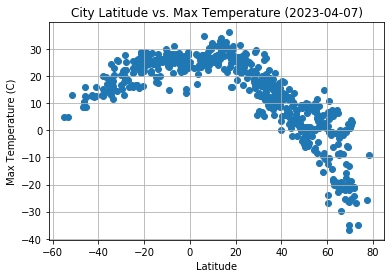

In [15]:
# Build scatter plot for latitude vs. temperature
date = city_data_df["Date"][0]

plt.scatter(city_data_df['Lat'], city_data_df['Max Temp'])

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.title(f'City Latitude vs. Max Temperature ({date})')
plt.grid()

# Save the figure
#plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

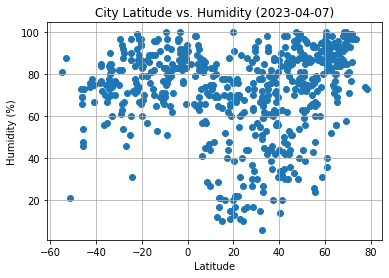

In [16]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df['Lat'], city_data_df['Humidity'])

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title(f'City Latitude vs. Humidity ({date})')
plt.grid()
# Save the figure
#plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

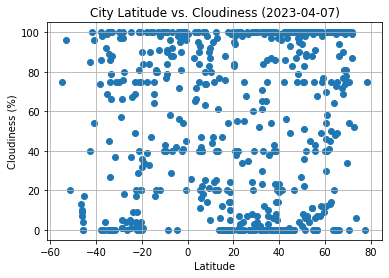

In [17]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df['Lat'], city_data_df['Cloudiness'])

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title(f'City Latitude vs. Cloudiness ({date})')
plt.grid()
# Save the figure
#plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

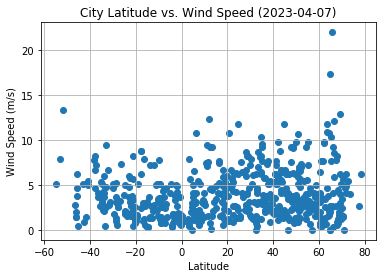

In [18]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df['Lat'], city_data_df['Wind Speed'])

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.title(f'City Latitude vs. Wind Speed ({date})')
plt.grid()

# Save the figure
#plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [19]:
# Define a function to create Linear Regression plots
def linear_regression(x_values, y_values, line_x, line_y):
    plt.scatter(x_values, y_values)
    (slope, intercept, pvalue, rvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    plt.plot(x_values, regress_values, "r-")
    plt.annotate(f'y= {round(slope, 2)}x + {round(intercept, 2)}', (line_x, line_y), fontsize=15, color='r')
    

In [20]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df["Lat"] >= 0,:]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,matara,5.9485,80.5353,24.01,87,42,2.99,LK,2023-04-07
2,butaritari,3.0707,172.7902,27.82,79,65,7.88,KI,2023-04-07
3,cumberland,35.0502,-78.8664,11.10,91,100,9.26,US,2023-04-07
6,jumla,29.2747,82.1838,5.64,51,0,2.28,NP,2023-04-07
10,provideniya,64.3833,-173.3000,-20.06,80,48,1.63,RU,2023-04-07


In [21]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df["Lat"] < 0,:]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,ushuaia,-54.8000,-68.3000,4.81,81,75,5.14,AR,2023-04-07
4,mataura,-46.1927,168.8643,8.60,66,10,1.39,NZ,2023-04-07
5,luderitz,-26.6481,15.1594,16.03,71,0,7.36,NaN,2023-04-07
7,bundaberg,-24.8500,152.3500,25.68,90,4,1.79,AU,2023-04-07
8,rikitea,-23.1203,-134.9692,25.00,71,69,6.01,PF,2023-04-07


###  Temperature vs. Latitude Linear Regression Plot

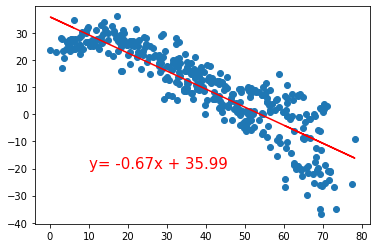

In [22]:
# Linear regression on Northern Hemisphere
linear_regression(northern_hemi_df['Lat'], northern_hemi_df['Max Temp'], 10, -20)

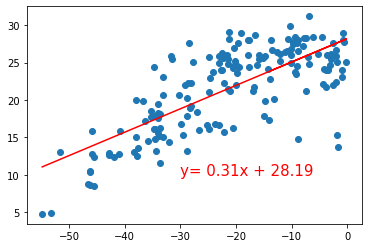

In [23]:
# Linear regression on Southern Hemisphere
linear_regression(southern_hemi_df['Lat'], southern_hemi_df['Max Temp'], -30, 10)

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

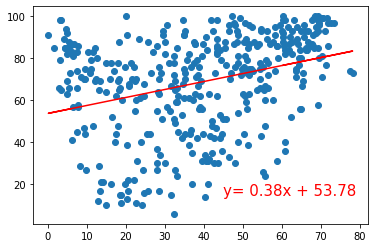

In [30]:
# Northern Hemisphere
linear_regression(northern_hemi_df['Lat'], northern_hemi_df['Humidity'], 45, 15)

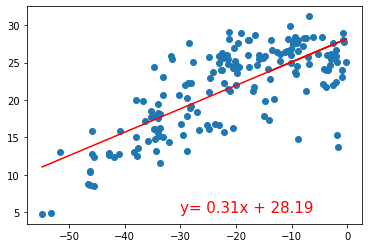

In [25]:
# Southern Hemisphere
linear_regression(southern_hemi_df['Lat'], southern_hemi_df['Max Temp'], -30, 5)

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

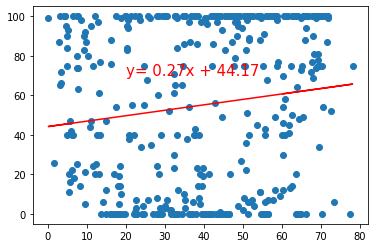

In [32]:
# Northern Hemisphere
linear_regression(northern_hemi_df['Lat'], northern_hemi_df['Cloudiness'], 20, 70)

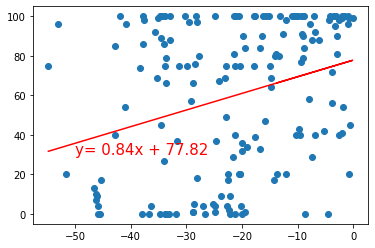

In [27]:
# Southern Hemisphere
linear_regression(southern_hemi_df['Lat'], southern_hemi_df['Cloudiness'], -50, 30)

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

In [28]:
# Northern Hemisphere
# YOUR CODE HERE

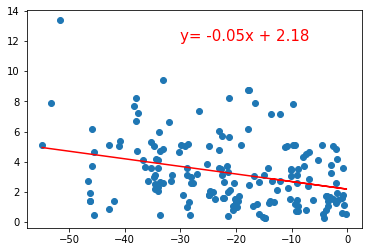

In [29]:
# Southern Hemisphere
linear_regression(southern_hemi_df['Lat'], southern_hemi_df['Wind Speed'], -30, 12)

**Discussion about the linear relationship:** YOUR RESPONSE HERE